In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression

In [3]:
df_v1 = pd.read_csv("dataset_1_labeled_train.csv")
df_v4 = pd.read_csv("dataset_4_labeled_test.csv")

In [5]:
df_v1.head()

,accident_id,created_at_date,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,total_acc_history_cnt_of_persons_5,acc_hitory_bool_by_0_null,acc_history_bool_by_0_0,acc_history_bool_by_0_1,accumulate_used_count,month,is_fraud,dataset,network,h3
0,1007811,2021-01-03,0,1,0,0,0,1,0,0,...,0,0,1,0,2,1,1,v1,0.0,0.63
1,1007691,2021-01-02,0,1,0,0,0,0,1,1,...,0,0,1,0,1,1,1,v1,1.0,0.56
2,1009501,2021-01-20,0,1,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,0.0,0.45
3,1010149,2021-01-26,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,v1,1.0,0.37
4,1008972,2021-01-15,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,v1,1.0,0.75


In [6]:
features = df_v1.columns.drop(['month', 'is_fraud', 'dataset', 'accident_id', 'created_at_date'])
labels = ['is_fraud']

In [7]:
# 데이터셋 확인 - v1 에는 22개의 의심 건
df_v1['is_fraud'].groupby(df_v1['is_fraud']).count()

is_fraud
0    4298
1      22
Name: is_fraud, dtype: int64

In [8]:
# 데이터셋 확인 - v4 에는 79개의 의심 건
df_v4['is_fraud'].groupby(df_v4['is_fraud']).count()

is_fraud
0    3203
1      79
Name: is_fraud, dtype: int64

(array([4298.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

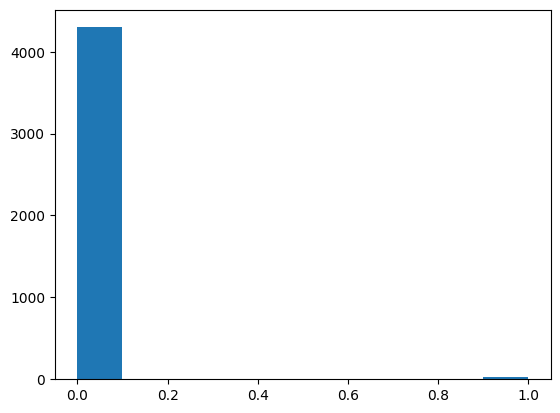

In [11]:
# 불균형성 확인 
plt.hist(df_v1['is_fraud'])

In [12]:
# 데이터셋 준비 
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]
 
X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

(array([   0.,    0.,    0.,    0.,    0., 3282.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

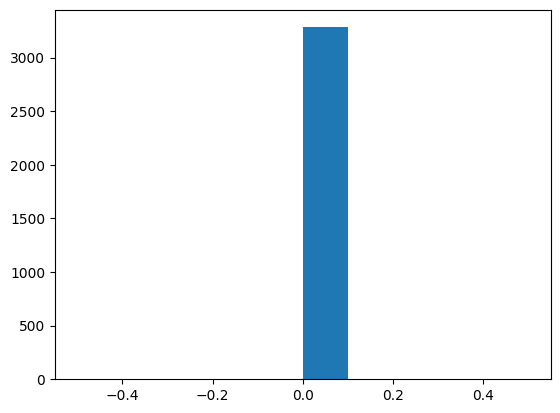

In [13]:
# 샘플링을 수행하지 않고 불규형한 상태에서 학습해보겠습니다. 
clf1 = LogisticRegression(random_state=0).fit(X_df_v1, Y_df_v1.values.ravel())


# 결과 확인
y = Y_df_v4
y_pred = clf1.predict(X_df_v4)
plt.hist(y_pred)

# 보험사기로 예측한 건이 1건도 없음을 알 수 있습니다.

* 보험사기로 예측한 건이 하나도없음 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3203
           1       0.00      0.00      0.00        79

    accuracy                           0.98      3282
   macro avg       0.49      0.50      0.49      3282
weighted avg       0.95      0.98      0.96      3282


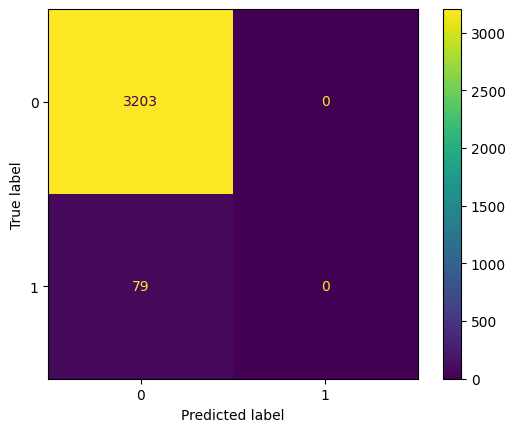

In [14]:
# 평가 
print(classification_report(y, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_estimator(clf1, X_df_v4, Y_df_v4)
plt.show()

### 언더샘플링 하여 학습하기

In [15]:
# 데이터셋 준비 
X_df_v1 = df_v1[features]
Y_df_v1 = df_v1[labels]
 
X_df_v4 = df_v4[features]
Y_df_v4 = df_v4[labels]

In [16]:
# 샘플링을 수행합니다. 
rus = RandomUnderSampler(random_state=42)
X_df_v1_sampled, Y_df_v1_sampled = rus.fit_resample(X_df_v1, Y_df_v1)

In [17]:
print(Y_df_v1)

      is_fraud
0            1
1            1
2            1
3            1
4            1
...        ...
4315         0
4316         0
4317         0
4318         0
4319         0

[4320 rows x 1 columns]


is_fraud
0    4298
1      22
Name: count, dtype: int64

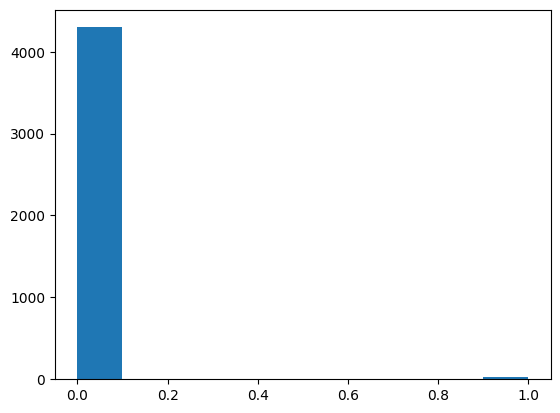

In [18]:
# 샘플링 전 
plt.hist(df_v1['is_fraud'])
df_v1['is_fraud'].value_counts()

(44, 1)


is_fraud
0    22
1    22
Name: count, dtype: int64

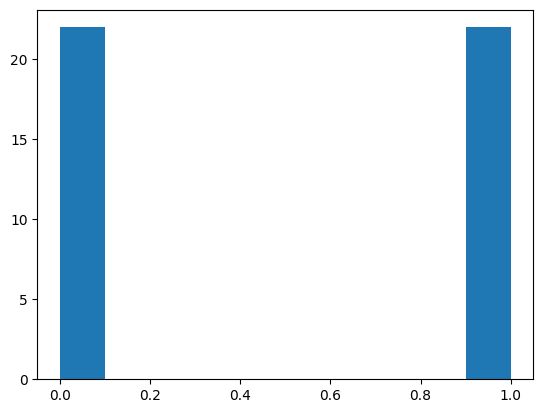

In [19]:
# 샘플링 후 
plt.hist(Y_df_v1_sampled)
print(Y_df_v1_sampled.shape)
Y_df_v1_sampled['is_fraud'].value_counts()

(array([1848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1434.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

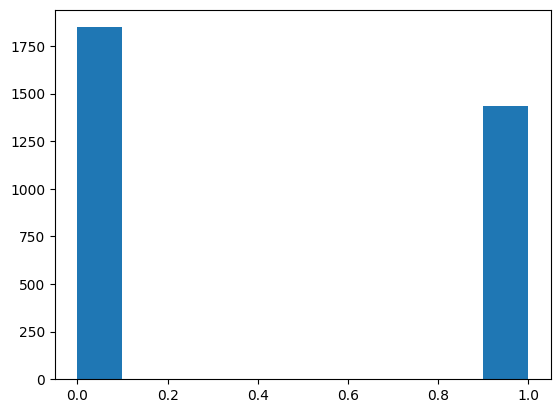

In [20]:
clf2 = LogisticRegression(random_state=0).fit(X_df_v1_sampled, Y_df_v1_sampled.values.ravel())

# 결과 확인
y = Y_df_v4
y_pred = clf2.predict(X_df_v4)
plt.hist(y_pred)

# 테스트셋 X_df_v4 에 대해 레이블이 비슷하게 예측함으로 확인할 수 있습니다.

              precision    recall  f1-score   support

           0       0.98      0.56      0.72      3203
           1       0.03      0.48      0.05        79

    accuracy                           0.56      3282
   macro avg       0.50      0.52      0.38      3282
weighted avg       0.95      0.56      0.70      3282


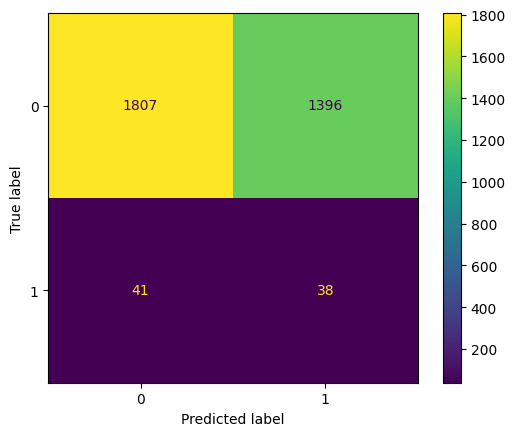

In [21]:
# 평가 
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(clf2, X_df_v4, Y_df_v4)  
plt.show()